In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, how = "left", on = "city")
# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
grouped = combined_df.groupby("city")

total_riders = grouped["ride_id"].count()

avg_fare = grouped["fare"].mean()

driver_and_type = city_df[["city", "driver_count", "type"]].sort_values("city").set_index("city")

df = pd.DataFrame({"total riders": total_riders,\
                   "average fare": avg_fare,\
                   "driver count": driver_and_type["driver_count"],\
                   "type": driver_and_type["type"]})

In [3]:
urban = df.loc[df["type"]=="Urban"]
suburban = df.loc[df["type"]=="Suburban"]
rural = df.loc[df["type"]=="Rural"]

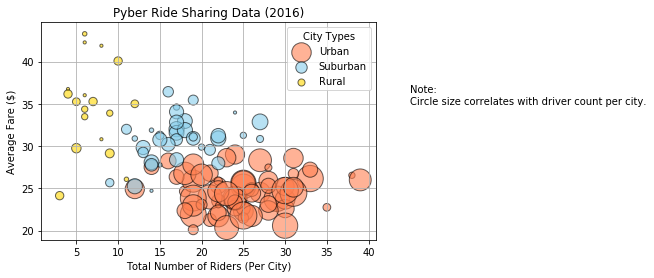

In [4]:
plt.scatter(urban["total riders"], urban["average fare"], s = urban["driver count"]*10,\
            alpha = 0.6, facecolors = "coral", edgecolors = "black", label = "Urban")
plt.scatter(suburban["total riders"], suburban["average fare"], s = suburban["driver count"]*10,\
            alpha = 0.6, facecolors = "skyblue", edgecolors = "black", label = "Suburban")
plt.scatter(rural["total riders"], rural["average fare"], s = rural["driver count"]*10,\
            alpha = 0.6, facecolors = "gold", edgecolors = "black", label = "Rural")

plt.legend(title="City Types")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Riders (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(45, 35, "Note:\nCircle size correlates with driver count per city.")
plt.grid()
plt.savefig("Images/pyber ride sharing data (2016).png")
plt.show()

## Total Fares by City Type

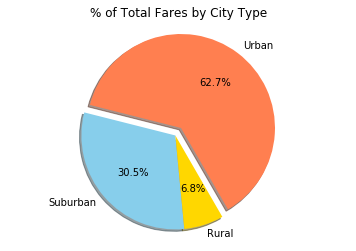

In [5]:
urban_percent = combined_df.loc[combined_df["type"]=="Urban"]["fare"].sum()
suburban_percent = combined_df.loc[combined_df["type"]=="Suburban"]["fare"].sum()
rural_percent = combined_df.loc[combined_df["type"]=="Rural"]["fare"].sum()

labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_percent, suburban_percent, rural_percent]
colors = ["coral", "skyblue", "gold"]
explode = (0.1, 0, 0)

plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", startangle=300, shadow = True)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.savefig("Images/% of total fares by city type.png")
plt.show()

## Total Rides by City Type

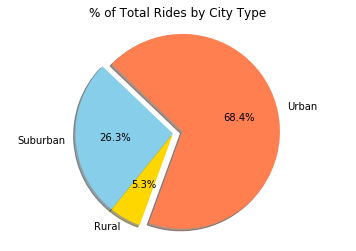

In [6]:
ride_count = combined_df.groupby("type")["ride_id"].count()

labels = ["Urban", "Suburban", "Rural"]
sizes = [ride_count["Urban"], ride_count["Suburban"], ride_count["Rural"]]
colors = ["coral", "skyblue", "gold"]
explode = (0.1, 0, 0)

plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", startangle=250, shadow = True)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.savefig("Images/% of total riders by city type.png")
plt.show()

## Total Drivers by City Type

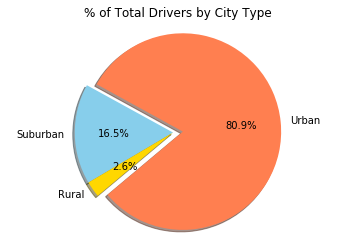

In [7]:
urban_percent = df.loc[df["type"]=="Urban"]["driver count"].sum() 
suburban_percent = df.loc[df["type"]=="Suburban"]["driver count"].sum() 
rural_percent = df.loc[df["type"]=="Rural"]["driver count"].sum()

labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_percent, suburban_percent, rural_percent]
colors = ["coral", "skyblue", "gold"]
explode = (0.1, 0, 0)

plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", startangle=220, shadow = True)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.savefig("Images/% of total drivers by city type.png")
plt.show()